# INVESTIGATING AI MODEL TOWARD BIAS ON HEART DISEASE
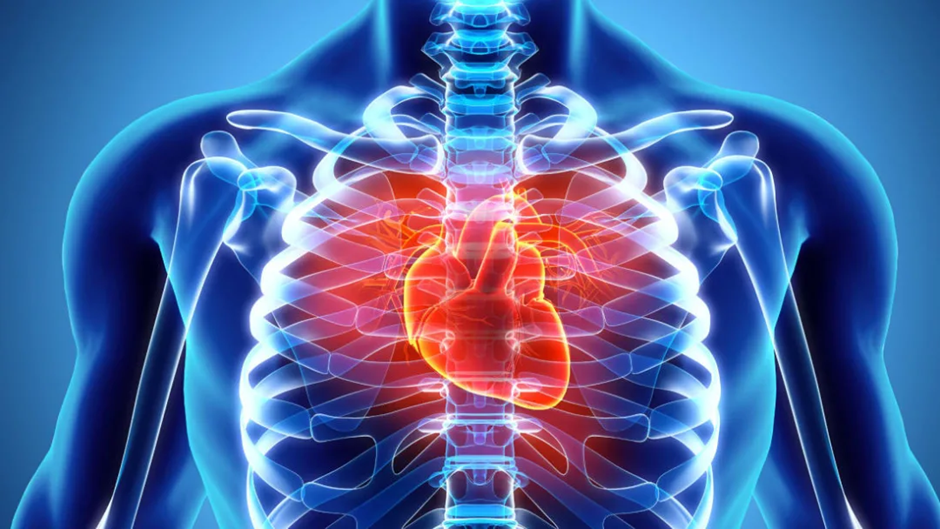

# Introduction
Heart disease, also referred as cardiovascular diseases, is broad term used for diseases and conditions affecting the heart and circulatory system. It is a major cause of disability all around the world. Since heart is amongst the most vital organs of the body, its diseases affect other organs and part of the body as well. There are several different types and forms of heart diseases. The most common ones cause narrowing or blockage of the coronary arteries, malfunctioning in the valves of the heart, enlargement in the size of heart and several others leading to heart failure and heart attack."https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease].
This project focuses specifically on AI-driven diagnostics for heart disease, a leading cause of mortality worldwide. Bias in predicting heart disease can lead to differential treatment of patients based on non-medical factors such as race, gender, or socioeconomic status, ultimately affecting the quality and accessibility of care provided to certain demographic groups.


# About the dataset
Column Descriptions
HeartDisease : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).

BMI : Body Mass Index (BMI).

Smoking : Have you smoked at least 100 cigarettes in your entire life? ( The answer Yes or No ).

AlcoholDrinking : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week

Stroke : (Ever told) (you had) a stroke?

PhysicalHealth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was 
your physical health not good? (0-30 days).

MentalHealth : Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).

DiffWalking : Do you have serious difficulty walking or climbing stairs?

Sex : Are you male or female?

AgeCategory: Fourteen-level age category.

Race : Imputed race/ethnicity value.

Diabetic : (Ever told) (you had) diabetes?

PhysicalActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their 14.. regular job.

GenHealth : Would you say that in general your health is...

SleepTime : On average, how many hours of sleep do you get in a 24-hour period?

Asthma : (Ever told) (you had) asthma?

KidneyDisease : Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?

SkinCancer : (Ever told) (you had) skin cancer?

# Import Libraries
lets start the project by importing all the libraries that we will need in the project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the dataset
heart_disease = pd.read_csv('heart_2022_with_nans.csv', index_col=0)

# Data Pre-processing


In [3]:
#Checking the table
heart_disease.head(10).T

State                                                                Alabama  \
Sex                                                                   Female   
GeneralHealth                                                      Very good   
PhysicalHealthDays                                                       0.0   
MentalHealthDays                                                         0.0   
LastCheckupTime            Within past year (anytime less than 12 months ...   
PhysicalActivities                                                        No   
SleepHours                                                               8.0   
RemovedTeeth                                                             NaN   
HadHeartAttack                                                            No   
HadAngina                                                                 No   
HadStroke                                                                 No   
HadAsthma                                                                 No   
HadSkinCancer                                                             No   
HadCOPD                                                                   No   
HadDepressiveDisorder                                                     No   
HadKidneyDisease                                                          No   
HadArthritis                                                              No   
HadDiabetes                                                              Yes   
DeafOrHardOfHearing                                                       No   
BlindOrVisionDifficulty                                                   No   
DifficultyConcentrating                                                   No   
DifficultyWalking                                                         No   
DifficultyDressingBathing                                                 No   
DifficultyErrands                                                         No   
SmokerStatus                                                    Never smoked   
ECigaretteUsage                                       Not at all (right now)   
ChestScan                                                                 No   
RaceEthnicityCategory                               White only, Non-Hispanic   
AgeCategory                                                  Age 80 or older   
HeightInMeters                                                           NaN   
WeightInKilograms                                                        NaN   
BMI                                                                      NaN   
AlcoholDrinkers                                                           No   
HIVTesting                                                                No   
FluVaxLast12                                                             Yes   
PneumoVaxEver                                                             No   
TetanusLast10Tdap          Yes, received tetanus shot but not sure what type   
HighRiskLastYear                                                          No   
CovidPos                                                                  No   

State                                                                Alabama  \
Sex                                                                   Female   
GeneralHealth                                                      Excellent   
PhysicalHealthDays                                                       0.0   
MentalHealthDays                                                         0.0   
LastCheckupTime                                                          NaN   
PhysicalActivities                                                        No   
SleepHours                                                               6.0   
RemovedTeeth                                                             NaN   
HadHeartAttack                                                            No   

This line retrieves the dimensions of the DataFrame 

In [4]:
heart_disease.shape

(445132, 39)

checking the concise summary of the DataFrame heart_disease, including the column names, non-null counts, and data types.

In [5]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445132 entries, Alabama to Virgin Islands
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        445132 non-null  object 
 1   GeneralHealth              443934 non-null  object 
 2   PhysicalHealthDays         434205 non-null  float64
 3   MentalHealthDays           436065 non-null  float64
 4   LastCheckupTime            436824 non-null  object 
 5   PhysicalActivities         444039 non-null  object 
 6   SleepHours                 439679 non-null  float64
 7   RemovedTeeth               433772 non-null  object 
 8   HadHeartAttack             442067 non-null  object 
 9   HadAngina                  440727 non-null  object 
 10  HadStroke                  443575 non-null  object 
 11  HadAsthma                  443359 non-null  object 
 12  HadSkinCancer              441989 non-null  object 
 13  HadCOPD             

# Exploratory Data Analysis

checking the statistics for numerical columns in the dataset, such as count, mean, standard deviation, minimum, maximum, etc.

In [6]:
heart_disease.describe()

PhysicalHealthDays  MentalHealthDays     SleepHours  HeightInMeters  \
count       434205.000000     436065.000000  439679.000000   416480.000000   
mean             4.347919          4.382649       7.022983        1.702691   
std              8.688912          8.387475       1.502425        0.107177   
min              0.000000          0.000000       1.000000        0.910000   
25%              0.000000          0.000000       6.000000        1.630000   
50%              0.000000          0.000000       7.000000        1.700000   
75%              3.000000          5.000000       8.000000        1.780000   
max             30.000000         30.000000      24.000000        2.410000   

       WeightInKilograms            BMI  
count      403054.000000  396326.000000  
mean           83.074470      28.529842  
std            21.448173       6.554889  
min            22.680000      12.020000  
25%            68.040000      24.130000  
50%            80.740000      27.440000  
75%            95.250000      31.750000  
max           292.570000      99.640000

check the number of duplicated rows in the dataset

In [7]:
heart_disease.duplicated().sum()

1693

In [8]:
#drops duplicate rows from the DataFrame heart_disease, keeping the first occurrence of each duplicated row.
heart_disease.drop_duplicates(keep='first',inplace=True)

This returns the total number of elements in the dataset, which is equal to the product of the number of rows and columns.

In [9]:
heart_disease.size

17294121

In [10]:
#This groups the dataset by 'AgeCategory' and 'HadHeartAttack' columns, to check whether young or adult or older are vulnerable to heart disease.
heart_disease.groupby('AgeCategory')['HadHeartAttack'].value_counts()

AgeCategory      HadHeartAttack
Age 18 to 24     No                26580
                 Yes                 122
Age 25 to 29     No                21721
                 Yes                 119
Age 30 to 34     No                25397
                 Yes                 187
Age 35 to 39     No                27907
                 Yes                 318
Age 40 to 44     No                29160
                 Yes                 445
Age 45 to 49     No                27552
                 Yes                 728
Age 50 to 54     No                32039
                 Yes                1250
Age 55 to 59     No                34511
                 Yes                1960
Age 60 to 64     No                41144
                 Yes                2890
Age 65 to 69     No                42969
                 Yes                3700
Age 70 to 74     No                38885
                 Yes                4215
Age 75 to 79     No                28401
                 Yes     

This line use to cleaned the age categories column in the dataset by removing the age that was attached to age number initially

In [11]:
# Drop rows with NaN values in the 'AgeCategory' column
heart_disease.dropna(subset=['AgeCategory'], inplace=True)

# Split the data by lines
lines = heart_disease['AgeCategory'].str.strip().str.split("\n")

# Remove the "Age" string from each line
cleaned_lines = []
for line in lines:
    if isinstance(line, list):
        cleaned_lines.append([item.replace("Age", "").strip() for item in line])
    else:
        cleaned_lines.append([])

# Join the cleaned lines back into a single string
cleaned_data = ["\n".join(line) for line in cleaned_lines]

# Replace the original 'AgeCategory' column with the cleaned data
heart_disease['AgeCategory'] = cleaned_data

print(heart_disease)

                   Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
State                                                                        
Alabama         Female     Very good                 0.0               0.0   
Alabama         Female     Excellent                 0.0               0.0   
Alabama         Female     Very good                 2.0               3.0   
Alabama         Female          Fair                 2.0               0.0   
Alabama           Male          Poor                 1.0               0.0   
...                ...           ...                 ...               ...   
Virgin Islands  Female          Good                 0.0               3.0   
Virgin Islands  Female     Excellent                 2.0               2.0   
Virgin Islands  Female          Poor                30.0              30.0   
Virgin Islands    Male     Very good                 0.0               0.0   
Virgin Islands    Male     Very good                 0.0        

In [12]:
#checking whether the age categories have corrected
heart_disease['AgeCategory']

State
Alabama           80 or older
Alabama           80 or older
Alabama              55 to 59
Alabama              40 to 44
Alabama           80 or older
                     ...     
Virgin Islands       18 to 24
Virgin Islands       50 to 54
Virgin Islands       65 to 69
Virgin Islands       70 to 74
Virgin Islands       40 to 44
Name: AgeCategory, Length: 434477, dtype: object

In [13]:
#investigate the Gender against heart disease whether to resampling it
heart_disease.groupby('Sex')['HadHeartAttack'].value_counts()

Sex     HadHeartAttack
Female  No                219411
        Yes                 9549
Male    No                187527
        Yes                15198
Name: count, dtype: int64

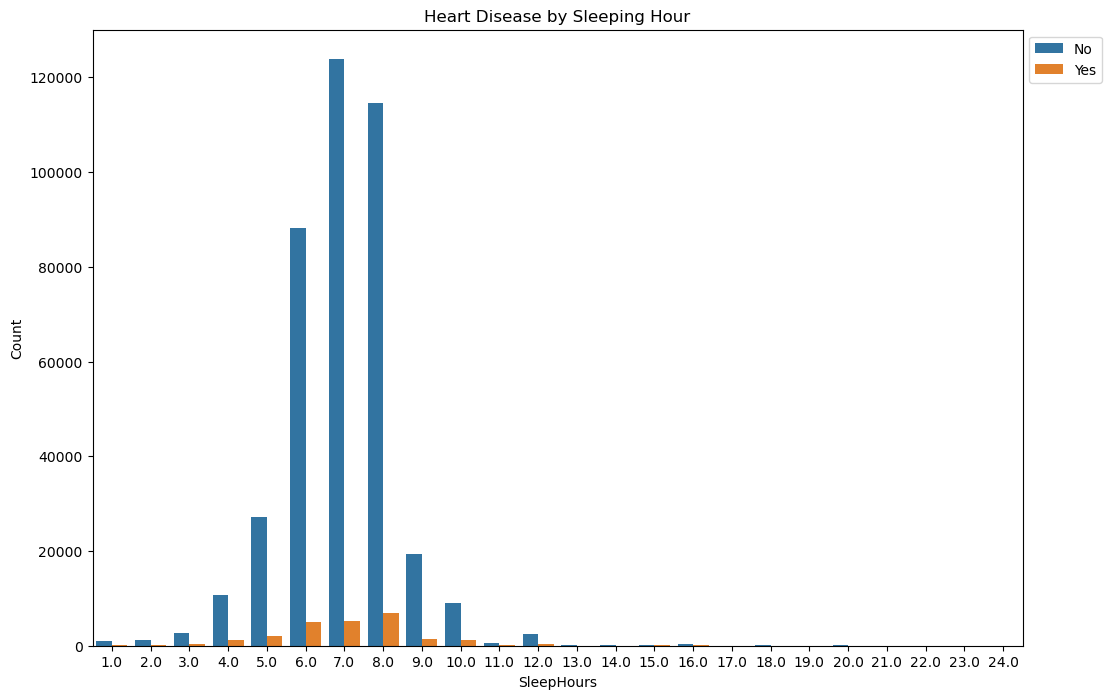

In [14]:
# Bivariate Analysis: HadHeartAttack by SleepHours
plt.figure(figsize=(12,8))
sns.countplot(x='SleepHours', hue='HadHeartAttack', data=heart_disease)
plt.title('Heart Disease by Sleeping Hour')
plt.xlabel('SleepHours')
plt.ylabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

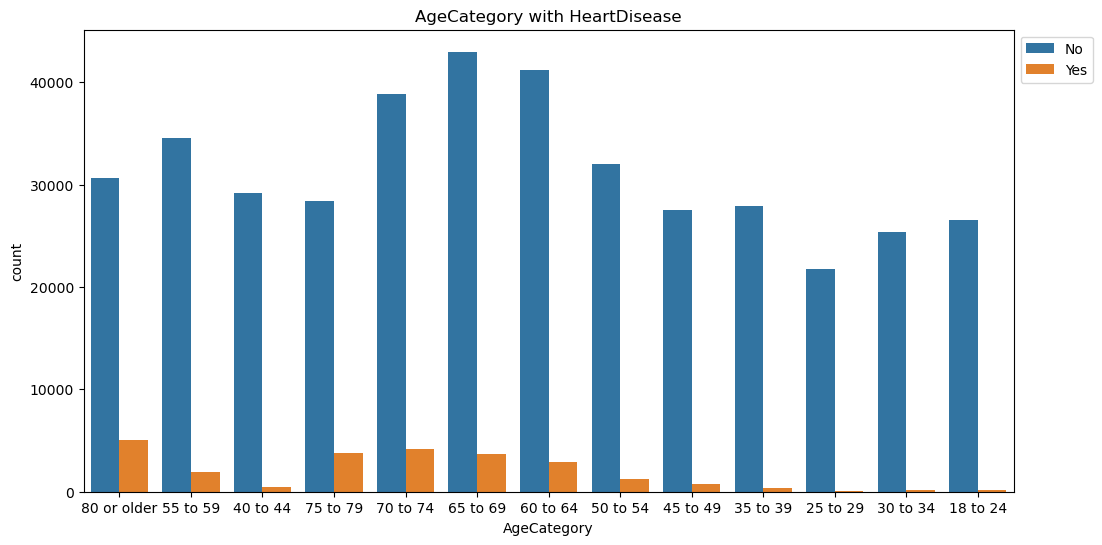

In [15]:
#Visualise the Age against Heart disease
plt.figure(figsize = (12,6))
plt.title("AgeCategory with HeartDisease")
sns.countplot(heart_disease,x="AgeCategory",hue="HadHeartAttack")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


Visualise the distribution of 'HadHeartAttack' by 'AgeCategory'.

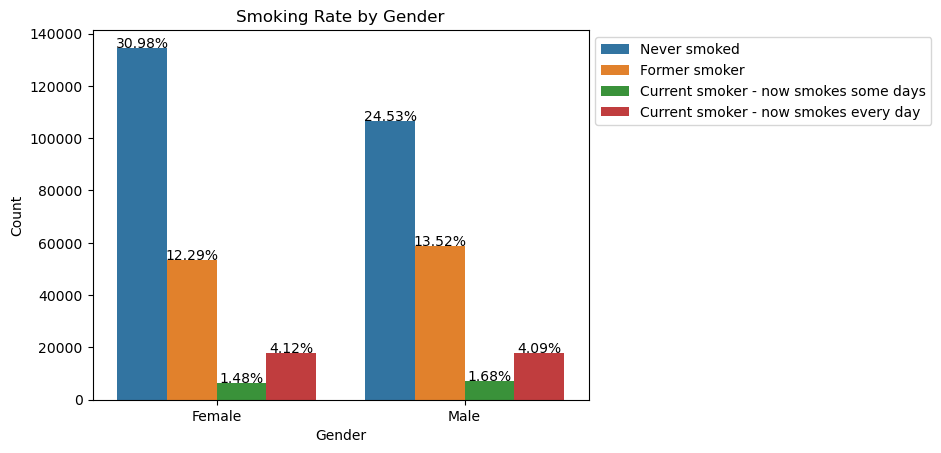

In [18]:
# Create countplot
ax = sns.countplot(x="Sex", hue="SmokerStatus", data= heart_disease)

# Add percentages on top of each bar
total = len(heart_disease)  # total number of observations

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, f'{height/total:.2%}', ha="center")

# Set plot title, labels, and show the plot
plt.title('Smoking Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [19]:
#Checking the null value in each column of the dataset
heart_disease.isnull().sum()

Sex                              0
GeneralHealth                 1082
PhysicalHealthDays           10511
MentalHealthDays              8605
LastCheckupTime               7810
PhysicalActivities             963
SleepHours                    5023
RemovedTeeth                 10587
HadHeartAttack                2792
HadAngina                     4128
HadStroke                     1338
HadAsthma                     1541
HadSkinCancer                 2883
HadCOPD                       1955
HadDepressiveDisorder         2486
HadKidneyDisease              1689
HadArthritis                  2360
HadDiabetes                    860
DeafOrHardOfHearing          17848
BlindOrVisionDifficulty      18735
DifficultyConcentrating      21274
DifficultyWalking            21063
DifficultyDressingBathing    20961
DifficultyErrands            22608
SmokerStatus                 31808
ECigaretteUsage              32081
ChestScan                    51852
RaceEthnicityCategory        11929
AgeCategory         

Text(220.72222222222223, 0.5, 'Rows')

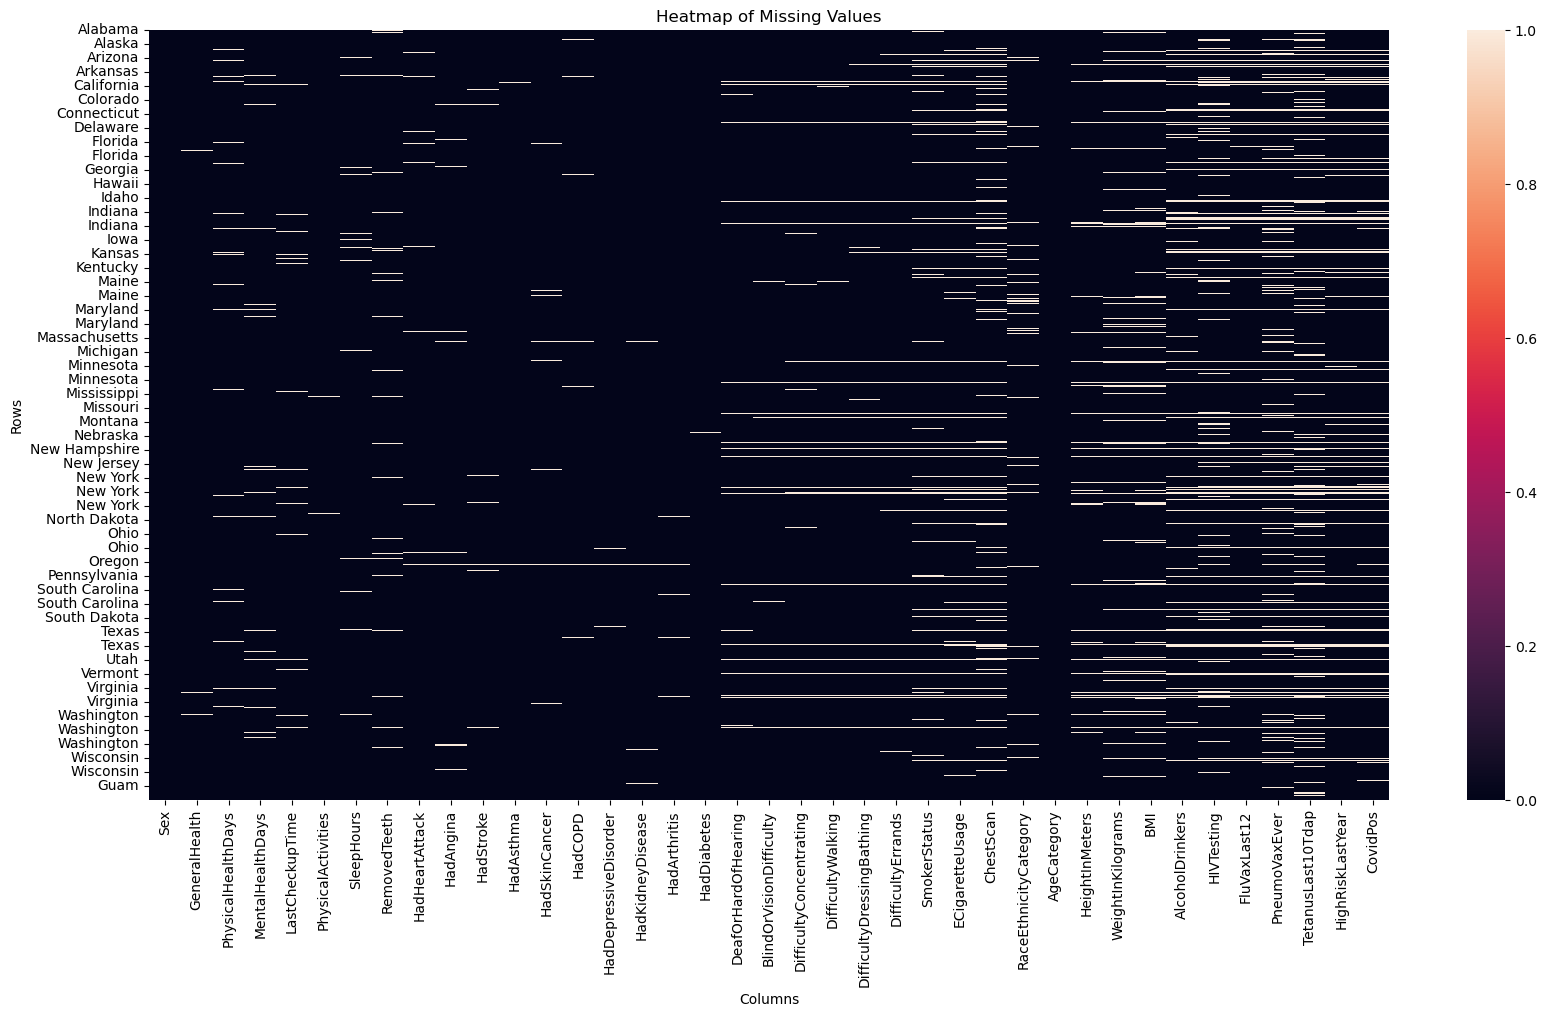

In [20]:
# Visualize the missing values as a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(heart_disease.isnull())
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')

This aims to impute missing values in numerical columns with the median and in categorical columns with the mode so as to handle the missing value in the dataset.

In [21]:
#separate the numerical columns in the dataset
#Impute missing values for numerical columns with median
numerical_cols = heart_disease.select_dtypes(include=['float64']).columns
heart_disease[numerical_cols] = heart_disease[numerical_cols].fillna(heart_disease[numerical_cols].median())

In [22]:
#Print the numerical column
numerical_cols

Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HeightInMeters', 'WeightInKilograms', 'BMI'],
      dtype='object')

In [23]:
#separate categorical columns in the dataset
#Impute missing values for categorical columns with mode
categorical_cols = heart_disease.select_dtypes(include=['object']).columns
heart_disease[categorical_cols] = heart_disease[categorical_cols].fillna(heart_disease[categorical_cols].mode().iloc[0])

In [24]:
#Print the categorical columns
categorical_cols

Index(['Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities',
       'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
       'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [25]:
#checking the nul value again whether it has been handle properly
heart_disease.isnull().sum()

Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
AlcoholD

Text(0.5, 1.0, 'Number of Males and Females in the dataset')

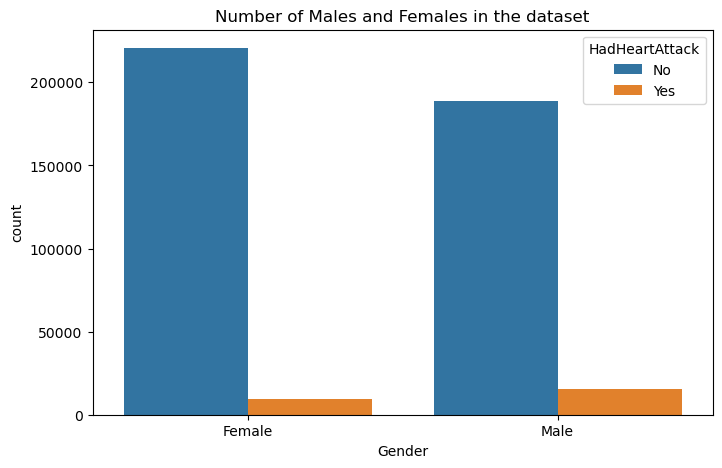

In [26]:
#visualise Gender against the heart disease
plt.figure(figsize=(8,5))
sns.countplot(data=heart_disease,x='Sex',hue='HadHeartAttack')
plt.xlabel('Gender')
plt.title('Number of Males and Females in the dataset')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


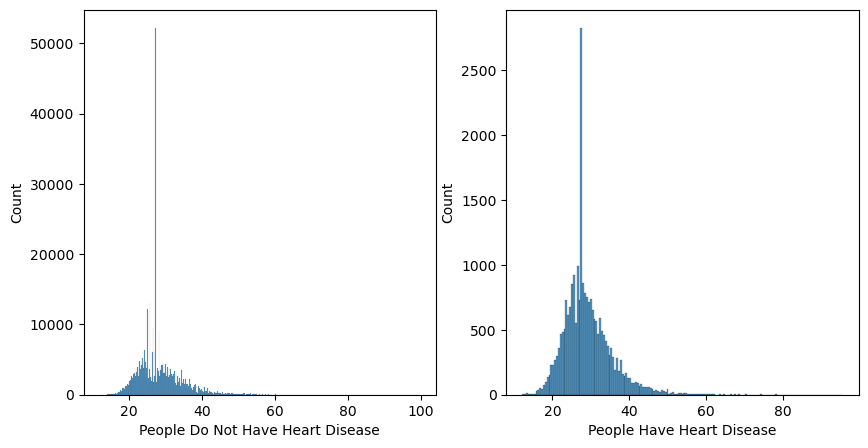

In [27]:
# Display blood pressure distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(10, 5))
ax = sns.histplot(heart_disease[heart_disease['HadHeartAttack'] == 'No']['BMI'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.histplot(heart_disease[heart_disease['HadHeartAttack'] == 'Yes']['BMI'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

# Visualisation
we aims to check remaining features against the heart disease. 

In [28]:
# Define the features
features = ['GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'PhysicalActivities', 'SleepHours', 'BMI', 'AgeCategory','HadDepressiveDisorder','AlcoholDrinkers']

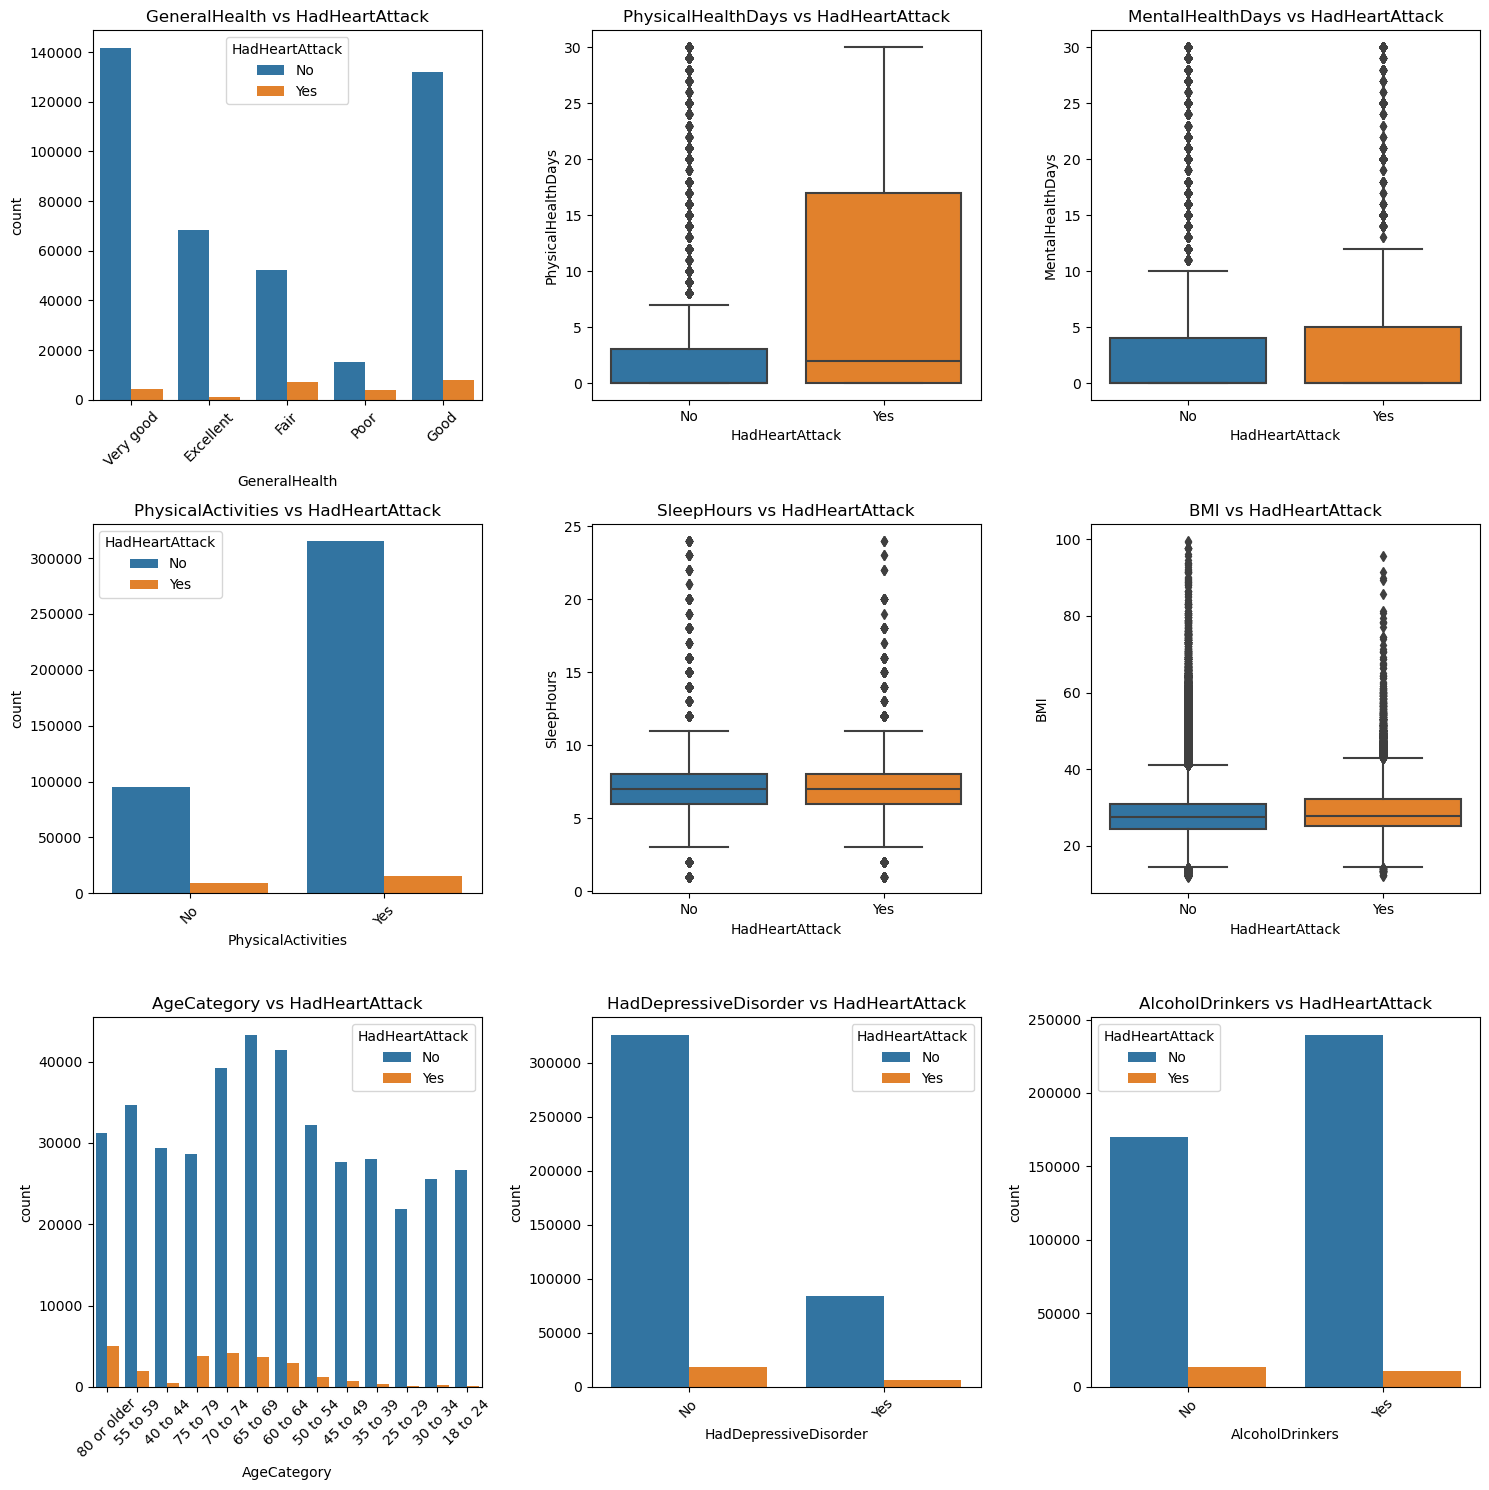

In [29]:
# Set up the plotting grid
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Iterate over each feature and create plots
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    
    # Bar plot for categorical feature
    if heart_disease[feature].dtype == 'object':
        sns.countplot(x=feature, hue='HadHeartAttack', data=heart_disease, ax=axes[row, col])
        axes[row, col].set_title(f'{feature} vs HadHeartAttack')
        axes[row, col].tick_params(axis='x', rotation=45)
    
    # Box plot for numerical feature
    else:
        sns.boxplot(x='HadHeartAttack', y=feature, data=heart_disease, ax=axes[row, col])
        axes[row, col].set_title(f'{feature} vs HadHeartAttack')

plt.tight_layout()

In [30]:
# Define mapping
mapping = {"Yes": 1, "No": 0}

# Replace values
heart_disease["HadHeartAttack"] = heart_disease["HadHeartAttack"].replace(mapping)

In [31]:
# Define mapping
mapping = {"Male": 1, "Female": 0}

# Replace values
heart_disease["Sex"] = heart_disease["Sex"].replace(mapping)

Text(0.5, 1.0, 'Heart Disease')

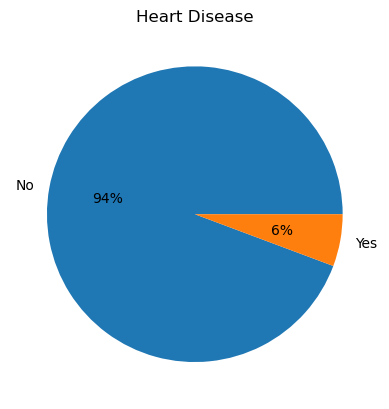

In [32]:
# Create a plot to display the percentage of the positive and negative heart disease 
labels = ['No', 'Yes']
values = heart_disease['HadHeartAttack'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')

In [33]:
# Encode categorical variables
label_encoder = LabelEncoder()
for column in heart_disease.select_dtypes(include=['object']).columns:
    heart_disease[column] = label_encoder.fit_transform(heart_disease[column])

# The heatmap visualizes. 
The correlation coefficients between pairs of numerical features in the DataFrame. Each cell in the heatmap represents the correlation coefficient between two features, with colors indicating the strength and direction of the correlation. Positive correlations are represented by lighter shades, negative correlations by darker shades, and no correlation by neutral colors. This visualization helps to identify patterns and relationships between different features in the dataset. Checking the relationship between the features. and decide the features to drop if the have correlate with each other

<Axes: >

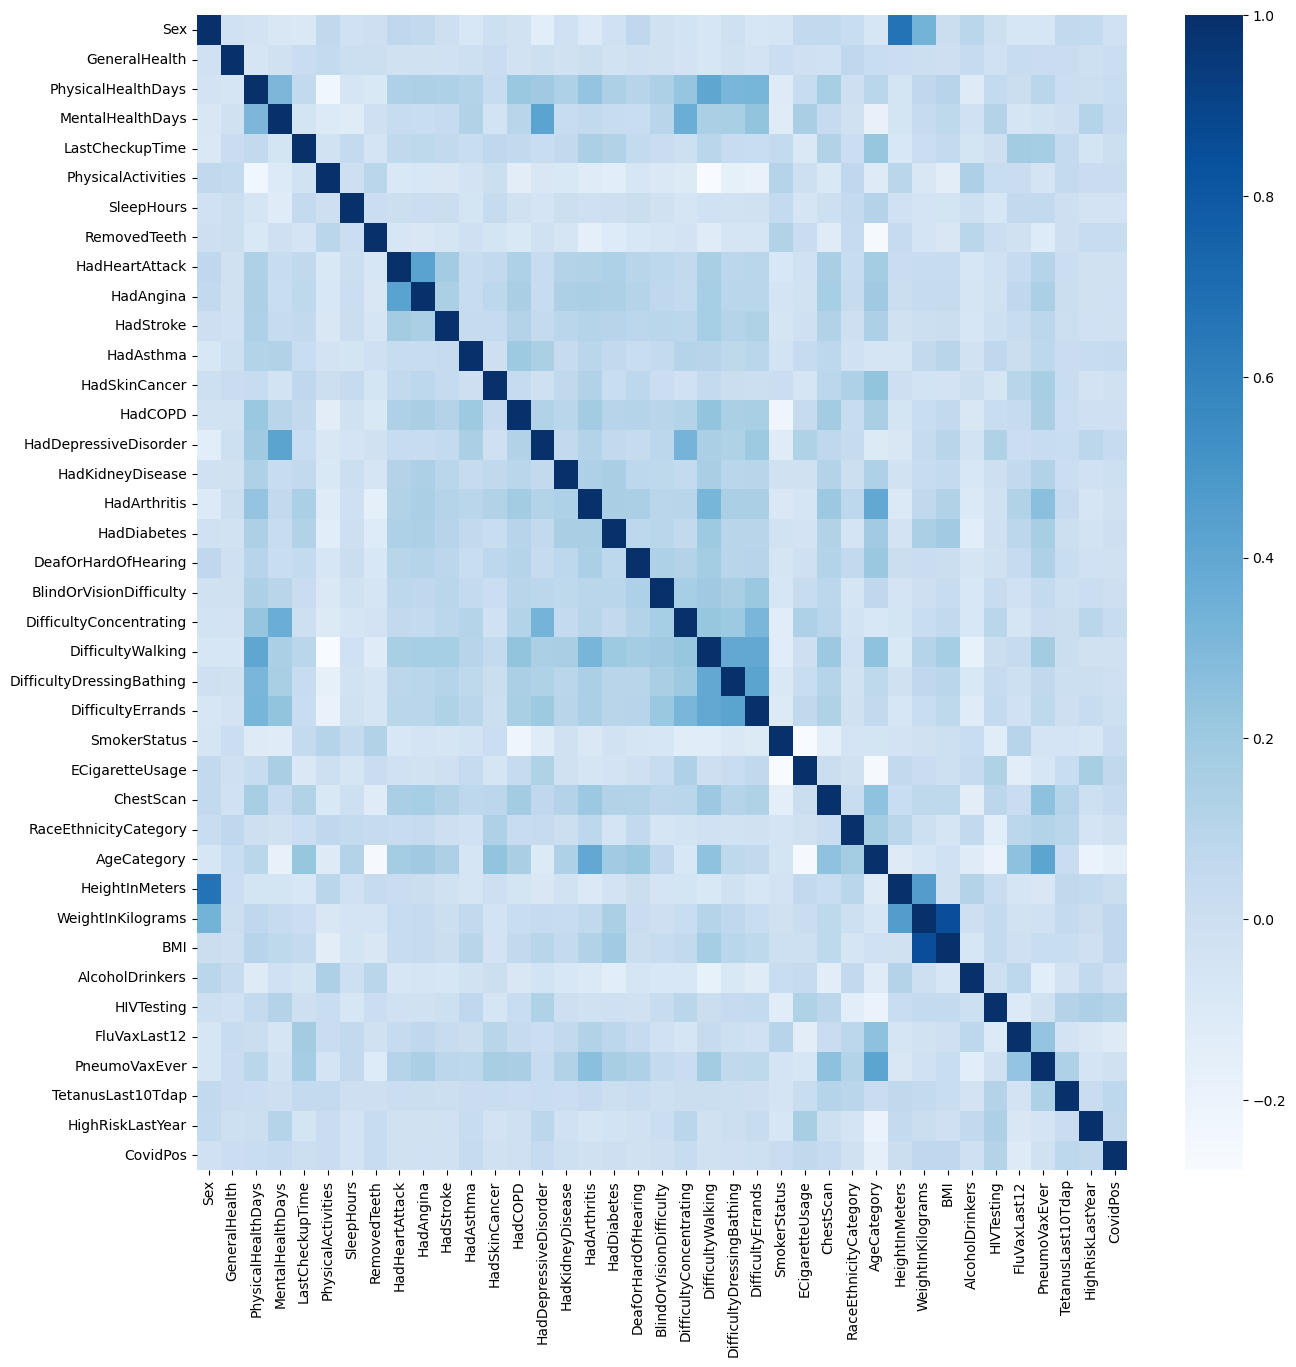

In [34]:
# Correlation map 
plt.figure(figsize=(15, 15))
sns.heatmap(heart_disease.corr(), cmap = "Blues")

In [35]:
# Check the balance of the classes, whether to apply resampling
class_counts = heart_disease['HadHeartAttack'].value_counts()
print(class_counts)

HadHeartAttack
0    409730
1     24747
Name: count, dtype: int64


In [36]:
# Split data into features and target variable
X = heart_disease.drop(columns=['HadHeartAttack'])  # Features
y = heart_disease['HadHeartAttack']  # Target variable

In [37]:
'''# Standardize features (optional but recommended for some models like SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# X_test = scaler.transform(X_test)'''

'# Standardize features (optional but recommended for some models like SVM)\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)\n# X_test = scaler.transform(X_test)'

In [38]:
# Apply SMOTE to address class imbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [39]:
# initializing under and over sampling
heart_under = RandomUnderSampler(random_state=42)
heart_over = SMOTE(random_state=42)

In [40]:
# under sampling of X, y 
heart_under.fit_resample(X,y)

 # over sampling of X, y
X_heart, y_heart = heart_over.fit_resample(X,y)
print(X_heart)

        Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0         0              4            0.000000          0.000000   
1         0              0            0.000000          0.000000   
2         0              4            2.000000          3.000000   
3         0              1            2.000000          0.000000   
4         1              3            1.000000          0.000000   
...     ...            ...                 ...               ...   
819455    0              2            6.821996          0.000000   
819456    1              3           30.000000          0.000000   
819457    0              3            0.000000          3.049449   
819458    0              0            0.000000          0.000000   
819459    0              2            0.000000          0.000000   

        LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
0                     3                   0    8.000000             3   
1                     3              

In [41]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42)

In [42]:
#create a dataframe for X_tain and X_test. it will be useful when separating the Protected character group so as to generate the indices of each
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [43]:
#print the X_test 
X_test

Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
393467    0              2            3.000000         15.000000   
327917    1              4            0.000000         12.000000   
483703    1              2            0.000000          0.000000   
422617    1              2            0.000000         30.000000   
21599     1              1            0.000000          0.000000   
...     ...            ...                 ...               ...   
379834    0              2            4.000000          7.000000   
632158    0              2            0.000000         10.000000   
599637    0              1           30.000000          4.949692   
498304    1              1            3.639954          0.000000   
20461     1              4            0.000000          0.000000   

        LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
393467                3                   1    8.000000             3   
327917                0                   1    7.000000             3   
483703                3                   1    6.715806             0   
422617                3                   0    4.000000             0   
21599                 3                   1    6.000000             3   
...                 ...                 ...         ...           ...   
379834                3                   0    6.000000             3   
632158                2                   1    6.000000             1   
599637                3                   0    7.949692             0   
498304                3                   0    5.639954             1   
20461                 1                   1    7.000000             3   

        HadAngina  HadStroke  ...  HeightInMeters  WeightInKilograms  \
393467          0          0  ...        1.680000          81.650000   
327917          0          0  ...        1.800000          90.720000   
483703          1          0  ...        1.700000          80.740000   
422617          0          0  ...        1.700000          61.230000   
21599           0          0  ...        1.910000         127.010000   
...           ...        ...  ...             ...                ...   
379834          0          0  ...        1.650000          80.740000   
632158          0          0  ...        1.639044          68.040000   
599637          1          0  ...        1.780000          72.501581   
498304          0          0  ...        1.760801          88.450000   
20461           0          0  ...        1.780000          72.570000   

              BMI  AlcoholDrinkers  HIVTesting  FluVaxLast12  PneumoVaxEver  \
393467  29.050000                1           1             0              1   
327917  27.890000                0           0             0              0   
483703  27.440000                0           0             0              0   
422617  21.140000                1           1             1              1   
21599   35.000000                0           0             0              0   
...           ...              ...         ...           ...            ...   
379834  27.440000                0           0             0              0   
632158  25.392752                0           0             0              1   
599637  22.938368                0           0             1              1   
498304  28.504762                1           0             0              0   
20461   22.960000                0           0             1              0   

        TetanusLast10Tdap  HighRiskLastYear  CovidPos  
393467                  0                 0         0  
327917                  2                 0         0  
483703                  2                 0         0  
422617                  1                 0         0  
21599                   1                 0         0  
...                   ...               ...       ...  
379834                  2                 0         2  
632158                  1                 0         

In [44]:
#Name the model using in this study
model = GradientBoostingClassifier()

In [45]:
#Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [46]:
#Import some metrics to use to checking the performance of the choosing algorithm
#Also to use in check fairness criteria on choosing protected character
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay  

In [47]:
# Print classification report for model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     81826
           1       0.90      0.89      0.90     82066

    accuracy                           0.90    163892
   macro avg       0.90      0.90      0.90    163892
weighted avg       0.90      0.90      0.90    163892



# The Classification Report
The classification report indicates that the Gradient Boosting model performs well in predicting instances of both heart attacks and no heart attacks, achieving high precision, recall, and F1-score for both classes, with a high overall accuracy of 90%.

TN=74119, FP=7707, FN=9201, TP=72865


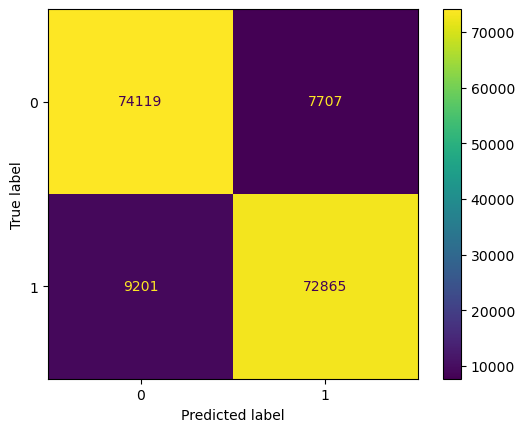

In [48]:
#visualise the confusion metrics for the model
cm = metrics.confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(tn, fp, fn, tp))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

These values are essential for evaluating the performance of the model, particularly for metrics like precision, recall, and F1-score, as they are calculated based on these counts from the confusion matrix

In [49]:
#Print all the result for the model
accuracy = metrics.accuracy_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
positive_rate = sum(y_pred) / len(y_pred)  # Positive rate = (number of positive predictions) / (total predictions)
print("Accuracy={0}, Recall={1}, Precision={2}, Positive_rate={3}".format(accuracy, recall, precision, positive_rate))

Accuracy=0.896834500768799, Recall=0.887882923500597, Precision=0.9043464230750137, Positive_rate=0.49161643033216995


These metrics indicate that the Gradient Boosting model performs relatively well in classifying instances of heart attacks. It achieves high accuracy, recall, and precision, indicating good overall performance in correctly identifying instances of heart attacks. However, the positive rate being around 49.16% suggests that the model might have some room for improvement in terms of reducing false positives and increasing the proportion of correctly predicted positive instances.

In [50]:
# Get predicted probabilities for the positive class for model
y_pred_proba = model.predict_proba(X_test)[:, 1]
# Calculate false positive rate (FPR), true positive rate (TPR), and threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

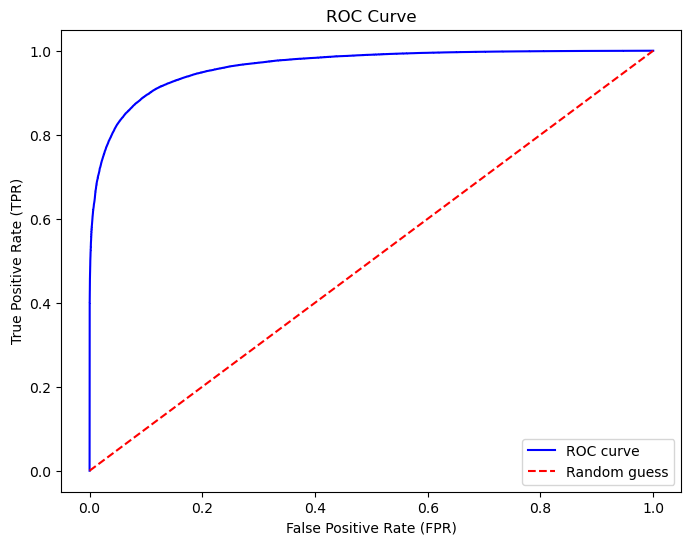

In [51]:
# Plot ROC curve for model
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()

In [52]:
# Calculate ROC AUC score foor model
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9634402657855159


# Choosing Gender for the Investigation
It analyzes the distribution of male and female samples within the test dataset and identifies the indices corresponding to each gender. This analysis helps in assessing whether the model's predictions or outcomes are biased towards one gender over the other. By understanding the distribution of genders and their respective indices, researchers can evaluate the model's performance and fairness criteria concerning gender bias.

In [53]:
PROTECTED = "Sex"
MEN = 1 #male
WOMEN = 0 #female
gender_dist = X_test[PROTECTED].value_counts()
print(gender_dist)
men_indices = np.where(X_test[PROTECTED] == MEN)[0]
women_indices = np.where(X_test[PROTECTED] == WOMEN)[0]
print(men_indices, "No of Men =", men_indices.size)
print(women_indices, "No of Women =", women_indices.size)

Sex
0    83602
1    80290
Name: count, dtype: int64
[     1      2      3 ... 163886 163890 163891] No of Men = 80290
[     0      5      6 ... 163887 163888 163889] No of Women = 83602


This creates two separate lists containing the actual labels (target values) for male and female samples, respectively, from the test dataset. It achieves this by iterating over the indices of male and female samples (men_indices and women_indices) and extracting the corresponding target values.

In [54]:
Y_test_m = [y_test.values[i] for i in men_indices]
Y_test_f= [y_test.values[i] for i in women_indices]

This code creates two separate lists containing the predicted labels (model outputs) for male and female samples, respectively, from the test dataset. Similar to the previous code snippet, it iterates over the indices of male and female samples (men_indices and women_indices) and extracts the corresponding predicted labels.

In [55]:
y_predict_m = [y_pred[i] for i in men_indices]
y_predict_f = [y_pred[i] for i in women_indices]
#print(y_predict_m)
#print()
#print(y_predict_f)

In [56]:
# Print classification report for male
print("Classification Report:")
print(classification_report(Y_test_m, y_predict_m))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     37712
           1       0.90      0.89      0.89     42578

    accuracy                           0.89     80290
   macro avg       0.89      0.89      0.89     80290
weighted avg       0.89      0.89      0.89     80290



This classification report suggests that the Gradient Boosting model performs well in predicting instances of both heart attacks and no heart attacks among males, achieving high precision, recall, and F1-score for both classes, with a high overall accuracy of 89%.

TN=74119, FP=7707, FN=9201, TP=72865


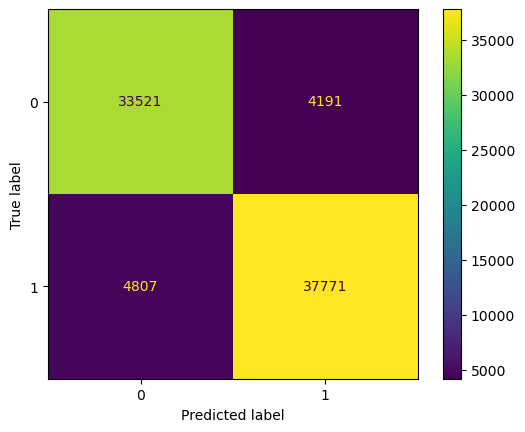

In [57]:
#for male parity
cm_male = metrics.confusion_matrix(Y_test_m, y_predict_m)
tn, fp, fn, tp = cm. ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(tn, fp, fn, tp))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_male)
disp.plot()

These values are crucial for assessing the performance of the model specifically for male gender predictions, helping to calculate metrics like precision, recall, and F1-score tailored to this gender group

In [58]:
# for male result 
accuracy = metrics.accuracy_score(Y_test_m, y_predict_m)
recall = metrics.recall_score(Y_test_m, y_predict_m)
precision = metrics.precision_score(Y_test_m, y_predict_m)
positive_rate = sum(y_predict_m) / len(y_predict_m)  # Positive rate = (number of positive predictions) / (total predictions)
print("Accuracy={0}, Recall={1}, Precision={2}, Positive_rate={3}".format(accuracy, recall, precision, positive_rate))

Accuracy=0.8879312492215718, Recall=0.8871013199304806, Precision=0.9001239216433916, Positive_rate=0.5226304645659484


These metrics collectively provide insights into the model's performance, specifically tailored to predictions for male gender, highlighting its accuracy, ability to capture true positive instances, precision in positive predictions, and the rate of positive predictions compared to actual positives among males.

In [59]:
# Print classification report for female
print("Classification Report:")
print(classification_report(Y_test_f, y_predict_f))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     44114
           1       0.91      0.89      0.90     39488

    accuracy                           0.91     83602
   macro avg       0.91      0.90      0.90     83602
weighted avg       0.91      0.91      0.91     83602



This classification report suggests that the Gradient Boosting model performs well in predicting instances of both heart attacks and no heart attacks among females, achieving high precision, recall, and F1-score for both classes, with a high overall accuracy of 91%.

TN=74119, FP=7707, FN=9201, TP=72865


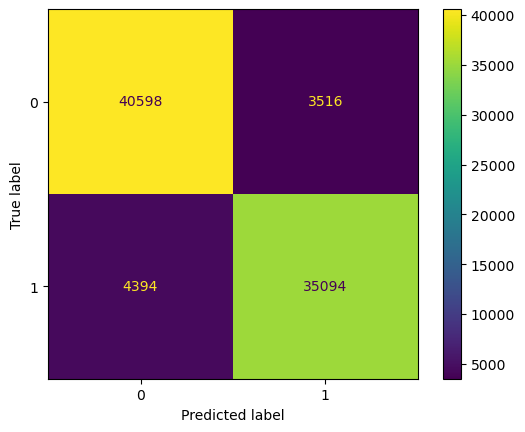

In [60]:
#for female parity
cm_female = metrics.confusion_matrix(Y_test_f, y_predict_f)
tn, fp, fn, tp = cm. ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(tn, fp, fn, tp))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_female)
disp.plot()

These values are crucial for assessing the performance of the model specifically for female gender predictions and can be used to calculate metrics like precision, recall, and F1-score tailored to this gender group.

In [61]:
#for female result
accuracy = metrics.accuracy_score(Y_test_f, y_predict_f)
recall = metrics.recall_score(Y_test_f, y_predict_f)
precision = metrics.precision_score(Y_test_f, y_predict_f)
positive_rate = sum(y_predict_f) / len(y_predict_f)  # Positive rate = (number of positive predictions) / (total predictions)
print("Accuracy={0}, Recall={1}, Precision={2}, Positive_rate={3}".format(accuracy, recall, precision, positive_rate))

Accuracy=0.9053850386354394, Recall=0.8887256888168558, Precision=0.9089355089355089, Positive_rate=0.46183105667328533


These metrics collectively provide insights into the model's performance, specifically tailored to predictions for female gender, highlighting its accuracy, ability to capture true positive instances, precision in positive predictions, and the rate of positive predictions compared to actual positives among females.

In [62]:
# Calculate ROC score for male and female
roc_auc_men = roc_auc_score(Y_test_m, y_predict_m)
roc_auc_women = roc_auc_score(Y_test_f, y_predict_f)

In [63]:
# Calculate ROC curve for male and female
fpr_men, tpr_men, _ = roc_curve(Y_test_m, y_predict_m)
fpr_women, tpr_women, _ = roc_curve(Y_test_f, y_predict_f)

ROC AUC Score for Male: 0.8879847923368992
ROC AUC Score for Female: 0.9045115500347596


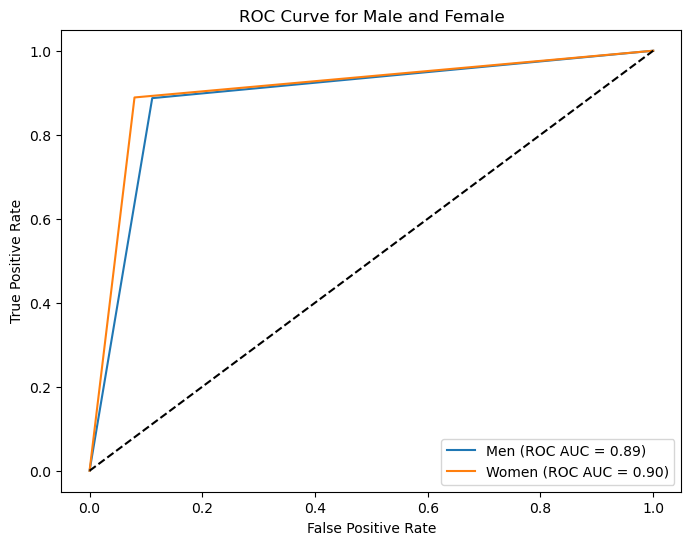

In [64]:
# Plot ROC curve for male and female
plt.figure(figsize=(8, 6))
plt.plot(fpr_men, tpr_men, label=f'Men (ROC AUC = {roc_auc_men:.2f})')
plt.plot(fpr_women, tpr_women, label=f'Women (ROC AUC = {roc_auc_women:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Male and Female')
plt.legend()

# Print ROC score for male and female
print("ROC AUC Score for Male:", roc_auc_men)
print("ROC AUC Score for Female:", roc_auc_women)

These scores suggest that the model performs slightly better in discriminating between positive and negative instances for female gender predictions (with a score of 0.9045) compared to male gender predictions (with a score of 0.8880).

A ROC AUC score closer to 1 indicates better discrimination ability, meaning that the model is better at distinguishing between positive and negative instances. Therefore, the higher ROC AUC score for female gender predictions suggests that the model performs slightly better in this regard for female gender compared to male gender predictions.

# The Analysis Based on the Result on Gender
Based on a comprehensive analysis of the model's predictions and performance metrics, we have identified evidence suggesting bias in the model's treatment of gender groups. While the differences in performance metrics, including accuracy, recall, precision, ROC AUC scores, and positive rates, are relatively minor, they collectively indicate unequal treatment of one gender group compared to the other.

Specifically, when comparing male and female gender predictions, we observe slight variations in performance metrics. For instance, the accuracy for male gender predictions is 88.79%, while for female gender predictions, it's slightly higher at 90.54%. Similarly, the recall for male gender predictions is 88.71%, whereas for female gender predictions, it's 88.87%. These discrepancies, although small, suggest potential bias in the model's predictions.

Moreover, the ROC AUC score, which measures the model's discrimination ability, is slightly higher for female gender predictions (0.9045) compared to male gender predictions (0.8880). Additionally, the positive rate for male gender predictions is 0.5226 (52.26%), while for female gender predictions, it's 0.4618 (46.18%). Although the difference in positive rates is relatively small, it further contributes to our assessment of bias in the model's predictions.

Therefore, based on the evidence of slight differences in performance metrics, discrimination ability, and positive rates between male and female gender predictions, we conclude that bias exists in the model's predictions, with indications of unequal treatment toward the female gender group. Further investigation and mitigation efforts are recommended to address these disparities and ensure fairness across all demographic groups.

In [65]:
#Installing LIME for instatnce explanation of how the model made the decision
!pip install lime

Defaulting to user installation because normal site-packages is not writeable


In [66]:
#import joblib to save the app
import joblib
from joblib import dump, load
import lime
import lime.lime_tabular

In [67]:
# Save trained model using joblib
joblib.dump(model, 'RandomForest_model.joblib')

['RandomForest_model.joblib']

In [68]:
# Assuming you have already trained a RandomForestClassifier model named 'model'

# Get feature importances
feature_importances = model.feature_importances_

# Match feature importances with feature names (if your features have names)
feature_names = X_train.columns  # Assuming X_train is a DataFrame
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort feature importances in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or visualize feature importances
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")


SleepHours: 0.17461721271020567
RemovedTeeth: 0.13311828331310918
HadAngina: 0.11192348740770587
AgeCategory: 0.11088701002959246
SmokerStatus: 0.10733773784659485
AlcoholDrinkers: 0.059652043664479716
GeneralHealth: 0.04894385534048366
PhysicalActivities: 0.0481117199643701
HeightInMeters: 0.040699367493053744
ECigaretteUsage: 0.036374827475084526
HIVTesting: 0.03163336794572367
CovidPos: 0.0189464202828168
PhysicalHealthDays: 0.013510625112783043
HadAsthma: 0.011945193674638917
TetanusLast10Tdap: 0.00884509852305838
HadSkinCancer: 0.006715765298081434
HadDepressiveDisorder: 0.006276476082143041
HadDiabetes: 0.004603037628491789
DeafOrHardOfHearing: 0.0033478173009078775
DifficultyConcentrating: 0.003246446758205863
HadArthritis: 0.0031624536746349763
FluVaxLast12: 0.002794268573773898
BlindOrVisionDifficulty: 0.0024182578972113122
PneumoVaxEver: 0.0019101283589848795
LastCheckupTime: 0.001857802980938445
MentalHealthDays: 0.001855163319649142
DifficultyWalking: 0.0012607093830459741


In [69]:
feature_names = X.columns.tolist()
feature_names

['Sex',
 'GeneralHealth',
 'PhysicalHealthDays',
 'MentalHealthDays',
 'LastCheckupTime',
 'PhysicalActivities',
 'SleepHours',
 'RemovedTeeth',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'HeightInMeters',
 'WeightInKilograms',
 'BMI',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

In [70]:
# Define class names
class_names = ['No', 'Yes']

In [71]:
# Initialize LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, 
                                                   feature_names=feature_names, 
                                                   class_names=class_names, 
                                                   discretize_continuous=False)

In [72]:
# Select a sample to explain
sample_idx = 0

In [73]:
# Explain prediction
explanation = explainer.explain_instance(X_test.iloc[sample_idx], model.predict_proba, num_features=len(feature_names))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [74]:
# Display explanation
explanation.show_in_notebook()

# Important of features
This section lists the features along with their corresponding importance scores. The importance scores indicate the contribution of each feature to the model's prediction for the given instance. For instance, features such as "SmokerStatus," "HadAngina," "AgeCategory," etc., are listed along with their importance scores. These scores provide insights into which features are most influential in the model's decision-making process for the given instance.